##EDA Assignment



Problem Statement - From the given data developing and understanding patterns which can be used to as an indicator to for identify the applicants who can default on their loan.

Approach -

1. Understanding the problem statement.

2.  Understanding the data.

3. Dropping unwanted columns.

4. Checking for NULL values for individual values and if possiblem imputing it.

5. Univariate Analysis

6. Bivariate Analysis

7. Finding Correlation

Importing Libraray

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading Data from CSV File


df1 = application_data.csv


df2 = previous_application.csv

In [116]:
df1 = pd.read_csv('application_data.csv')
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
df2 = pd.read_csv('previous_application.csv')
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df1.shape

(149481, 122)

In [119]:
df2.shape

(331110, 37)

Removing Column

Based on the column description provided in column_description file and based on the expectation from this study, deciding which all columns to be removed.

In [120]:
# Dropping unwanted column from df1


df1.drop(df1.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns,axis=1,inplace = True)

In [121]:
df1.drop(df1.loc[:,'EXT_SOURCE_1':'EMERGENCYSTATE_MODE'].columns,axis=1,inplace = True)

In [122]:
df1.drop(df1.loc[:,['REGION_POPULATION_RELATIVE','OWN_CAR_AGE','FLAG_EMP_PHONE','FLAG_PHONE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']].columns,axis=1,inplace = True)

In [123]:
df1.drop(df1.loc[:,['REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']].columns,axis=1,inplace = True)

In [124]:
df1.drop(df1.loc[:,['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION']].columns,axis=1,inplace = True)

In [125]:
df1.drop(df1.loc[:,['REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_LIVE_CITY','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].columns,axis=1,inplace = True)

In [126]:
df1.drop(df1.loc[:,['AMT_ANNUITY','AMT_GOODS_PRICE']].columns,axis=1,inplace = True)

In [127]:
df1.shape

(149481, 31)

In [128]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  149481 non-null  int64  
 1   TARGET                      149481 non-null  int64  
 2   NAME_CONTRACT_TYPE          149481 non-null  object 
 3   CODE_GENDER                 149481 non-null  object 
 4   FLAG_OWN_CAR                149481 non-null  object 
 5   FLAG_OWN_REALTY             149481 non-null  object 
 6   CNT_CHILDREN                149481 non-null  int64  
 7   AMT_INCOME_TOTAL            149481 non-null  float64
 8   AMT_CREDIT                  149481 non-null  float64
 9   NAME_TYPE_SUITE             148869 non-null  object 
 10  NAME_INCOME_TYPE            149481 non-null  object 
 11  NAME_EDUCATION_TYPE         149481 non-null  object 
 12  NAME_FAMILY_STATUS          149481 non-null  object 
 13  NAME_HOUSING_T

Creating Subset of the data.

In [129]:
df1.nunique()

SK_ID_CURR                    149481
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CNT_CHILDREN                      13
AMT_INCOME_TOTAL                1587
AMT_CREDIT                      4647
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
DAYS_ID_PUBLISH                 6046
FLAG_MOBIL                         2
FLAG_WORK_PHONE                    2
FLAG_CONT_MOBILE                   2
FLAG_EMAIL                         2
OCCUPATION_TYPE                   18
CNT_FAM_MEMBERS                   13
REGION_RATING_CLIENT               3
REG_REGION_NOT_LIVE_REGION         2
ORGANIZATION_TYPE                 58
DAYS_LAST_PHONE_CHANGE          3636
AMT_REQ_CREDIT_BUREAU_HOUR         4
AMT_REQ_CREDIT_BUREAU_DAY          9
A

In [130]:
ID = ['SK_ID_CURR']
cat = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_WORK_PHONE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_CONT_MOBILE','FLAG_EMAIL','OCCUPATION_TYPE','REGION_RATING_CLIENT','REG_REGION_NOT_LIVE_REGION','ORGANIZATION_TYPE',]
cont = ['CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

Finding the columns with NULL values and imputing it.

In [131]:
df1.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
NAME_TYPE_SUITE                0.409417
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_EMAIL                     0.000000
OCCUPATION_TYPE               31.382584
CNT_FAM_MEMBERS                0.000669
REGION_RATING_CLIENT           0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
ORGANIZATION_TYPE              0.000000
DAYS_LAST_PHONE_CHANGE         0.001338


In [132]:
df1.OCCUPATION_TYPE.value_counts()

Laborers                 26852
Sales staff              15468
Core staff               13426
Managers                 10358
Drivers                   9015
High skill tech staff     5480
Accountants               4817
Medicine staff            4228
Security staff            3277
Cooking staff             2927
Cleaning staff            2231
Private service staff     1299
Low-skill Laborers        1003
Waiters/barmen staff       655
Secretaries                637
Realty agents              362
HR staff                   281
IT staff                   254
Name: OCCUPATION_TYPE, dtype: int64

In [133]:
df1.OCCUPATION_TYPE.isnull().mean()*100

31.382583739739502

THe Occupation_type column has 31% NULL value, this column cannot be dropped as occupation of a person is one of major factor while deciding the approval of loan. But we cannot also impute values as it will lead to concentration of data as LABORERS. Hence further analysis will be done by keeping the NULL values.

In [134]:
df1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      120801
Family              19556
Spouse, partner      5522
Children             1591
Other_B               844
Other_A               418
Group of people       137
Name: NAME_TYPE_SUITE, dtype: int64

####Imputing Missing Value

Adding MODE value in place of NULL values for NAME_TYPE_SUIT column.

In [135]:
df1.NAME_TYPE_SUITE= df1.NAME_TYPE_SUITE.fillna(df1.NAME_TYPE_SUITE.mode()[0])

In [136]:
df1.NAME_TYPE_SUITE.isnull().mean()

0.0

Adding Median value in place of NULL values for AMT_REQ_CREDIT_BUREAU_HOUR column.

In [137]:
df1.AMT_REQ_CREDIT_BUREAU_HOUR = df1.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df1.AMT_REQ_CREDIT_BUREAU_HOUR.median())

In [138]:
df1.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    148691
1.0       750
2.0        34
3.0         6
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

Adding Median value in place of NULL values for following columns

AMT_REQ_CREDIT_BUREAU_DAY

AMT_REQ_CREDIT_BUREAU_WEEK

AMT_REQ_CREDIT_BUREAU_MON  

AMT_REQ_CREDIT_BUREAU_QRT

AMT_REQ_CREDIT_BUREAU_YEAR

In [139]:
df1.AMT_REQ_CREDIT_BUREAU_DAY = df1.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df1.AMT_REQ_CREDIT_BUREAU_DAY.median())
df1.AMT_REQ_CREDIT_BUREAU_WEEK = df1.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df1.AMT_REQ_CREDIT_BUREAU_WEEK.median())
df1.AMT_REQ_CREDIT_BUREAU_MON = df1.AMT_REQ_CREDIT_BUREAU_MON.fillna(df1.AMT_REQ_CREDIT_BUREAU_MON.median())
df1.AMT_REQ_CREDIT_BUREAU_QRT = df1.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df1.AMT_REQ_CREDIT_BUREAU_QRT.median())
df1.AMT_REQ_CREDIT_BUREAU_YEAR = df1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df1.AMT_REQ_CREDIT_BUREAU_YEAR.median())

Adding Median value in place of NULL value for DAYS_LAST_PHONE_CHANGE column

In [140]:
df1.DAYS_LAST_PHONE_CHANGE = df1.DAYS_LAST_PHONE_CHANGE.fillna(df1.DAYS_LAST_PHONE_CHANGE.median())

#### Checking Data of individual Column

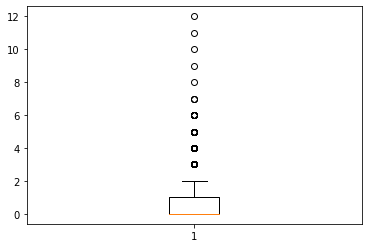

In [141]:
plt.boxplot(df1.CNT_CHILDREN)
plt.show()

there are 2 data points which indicates children count as 19, which in normal case is not possible. hence it can be considered as outlier.

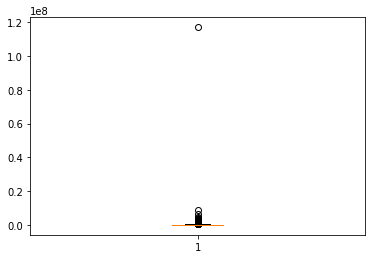

In [142]:
plt.boxplot(df1.AMT_INCOME_TOTAL)
plt.show()

As we can see, one value is way above as compared to other salaries. Hence outlier.

In [143]:
df1.DAYS_LAST_PHONE_CHANGE.describe()

count    149481.000000
mean       -961.963059
std         826.491851
min       -4185.000000
25%       -1569.000000
50%        -755.000000
75%        -273.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [144]:
df1.DAYS_LAST_PHONE_CHANGE = df1.DAYS_LAST_PHONE_CHANGE.abs()
df1.DAYS_LAST_PHONE_CHANGE.describe()

count    149481.000000
mean        961.963059
std         826.491851
min           0.000000
25%         273.000000
50%         755.000000
75%        1569.000000
max        4185.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [145]:
df1.DAYS_LAST_PHONE_CHANGE.value_counts()

0.0       18329
1.0        1353
2.0        1123
3.0         885
4.0         631
          ...  
3420.0        1
3857.0        1
3545.0        1
3541.0        1
3602.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3636, dtype: int64

Looking at the data it can be assumed that no customer changed the phone before applying for loan.

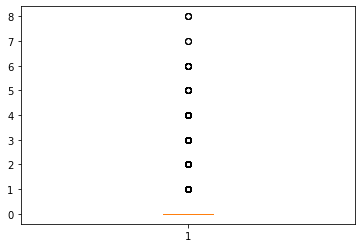

In [146]:
plt.boxplot(df1.AMT_REQ_CREDIT_BUREAU_QRT)
plt.show()

In [147]:
df1[df1.AMT_REQ_CREDIT_BUREAU_QRT==261]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,...,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


The outlier value is 261, which looks like a wrong data. If we look at the other columns related to BUREAU the count does not make sense. Hence it can be considered as outlier.

Understanding the Gender Distribution in the data set

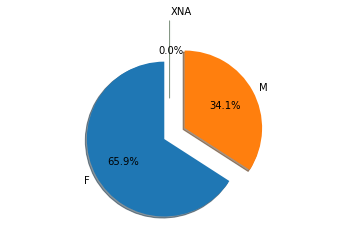

In [148]:
labels = 'F', 'M', 'XNA'
explode = (0.1, 0.2, 0.5)  
fig1, ax1 = plt.subplots()
ax1.pie(df1.CODE_GENDER.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

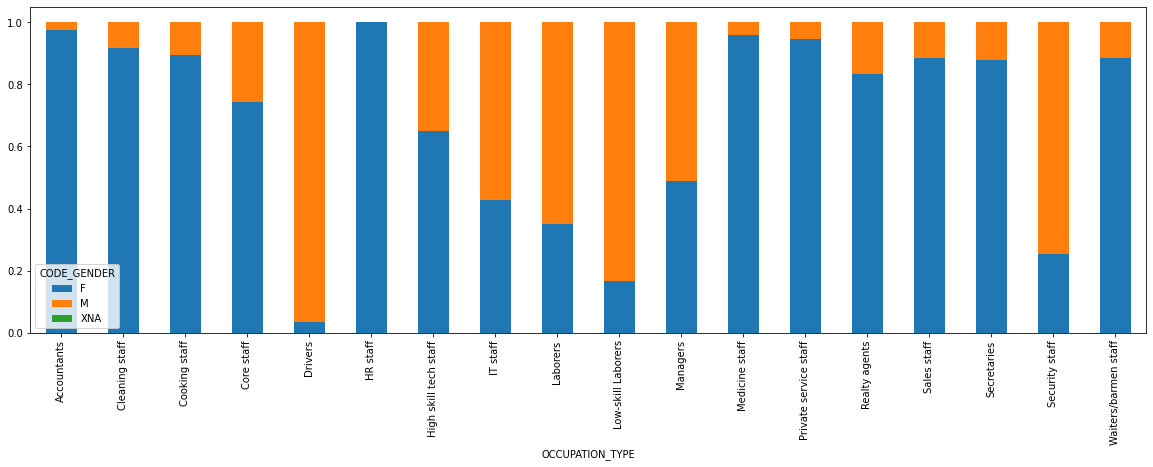

In [149]:
graph = pd.pivot_table(data=df1, values="TARGET", index="OCCUPATION_TYPE", columns="CODE_GENDER", aggfunc=sum)
graph_perc = graph[["F","M","XNA",]].apply(lambda x: x/x.sum(), axis=1)
graph_perc.plot(kind="bar", stacked="True", figsize=[20,6])
plt.show()

In [150]:
df1.AMT_INCOME_TOTAL.describe()

count    1.494810e+05
mean     1.689036e+05
std      3.193525e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [151]:
bins = [25650,56835,88020,119205,150390,181575,212760,243945,275130,306315,337500,1000000000]
slots = ['25650-56835','56835-88020','88020-119205','119250-150390','150390-181575', '181575-212760',
          '212760-243945','243945-275130','275130-306315','306315-337500','337500 and above']


df1['INCOME_RANGE'] = pd.cut(df1['AMT_INCOME_TOTAL'],bins,labels = slots)

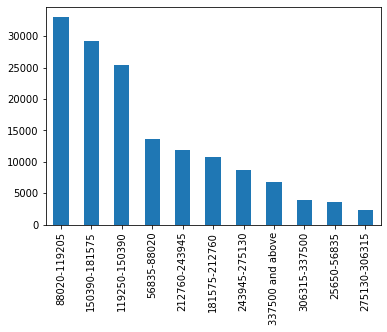

In [152]:
df1.INCOME_RANGE.value_counts().plot.bar()
plt.show()

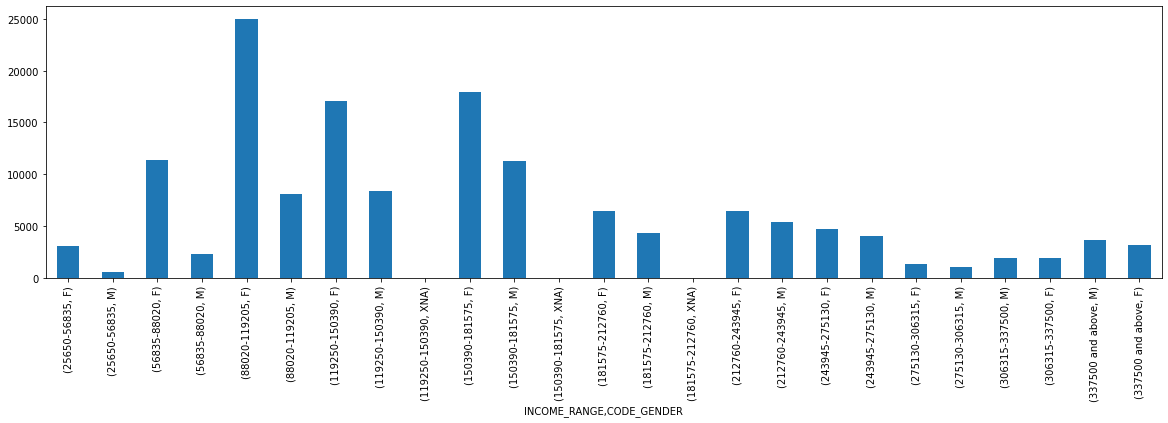

In [153]:
plt.figure(figsize = [20,5])
df1.groupby(by = ['INCOME_RANGE'])['CODE_GENDER'].value_counts().plot.bar()
plt.show()

Distribution of People Occupation wise who applied for loan

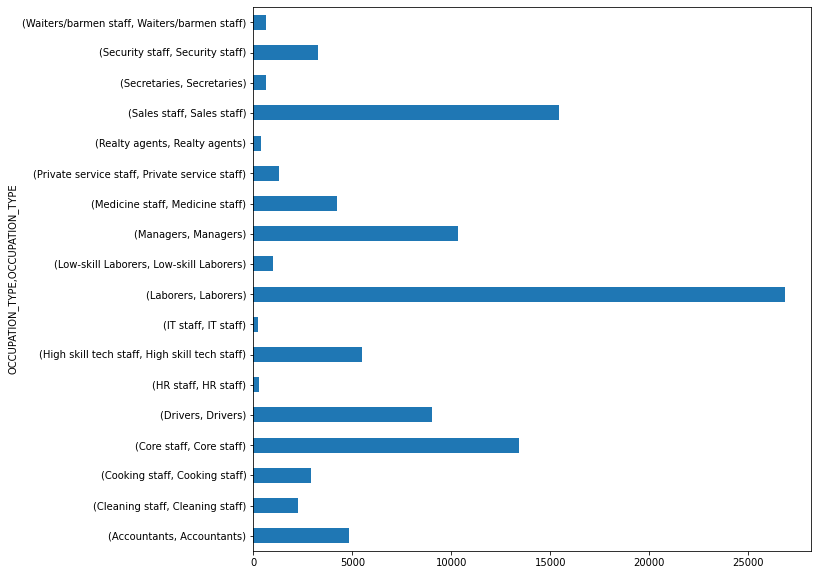

In [154]:
plt.figure(figsize = [10,10])
df1.groupby(by = ['OCCUPATION_TYPE'])['OCCUPATION_TYPE'].value_counts().plot.barh()
plt.show()

In [155]:
df1.TARGET.value_counts()

0    137265
1     12216
Name: TARGET, dtype: int64

Dividing the dataset based on TARGET column

In [156]:
Target_1 = df1[df1['TARGET']==1]
Target_1.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,...,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Unaccompanied,...,0,Business Entity Type 3,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,181575-212760
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,Unaccompanied,...,0,Business Entity Type 3,161.0,0.0,0.0,0.0,0.0,2.0,2.0,88020-119205


In [157]:
Target_1.shape

(12216, 32)

In [158]:
Target_1[Target_1.AMT_INCOME_TOTAL==117000000.0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,...,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,Unaccompanied,...,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,337500 and above


In [159]:
Target_1.drop(12840, axis = 0,inplace = True)# removing outlier value

In [160]:
Target_1.shape

(12215, 32)

In [161]:
Target_0 = df1[df1['TARGET']==0]
Target_0.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,...,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,Family,...,0,School,828.0,0.0,0.0,0.0,0.0,0.0,0.0,243945-275130
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Unaccompanied,...,0,Government,815.0,0.0,0.0,0.0,0.0,0.0,0.0,56835-88020


In [162]:
Target_0.shape

(137265, 32)

Calculating Imbalance

In [163]:
df1.TARGET.value_counts(normalize = True)*100

0    91.827724
1     8.172276
Name: TARGET, dtype: float64

there are 8% defaulter in the application data set.

####Unviariate Analysis

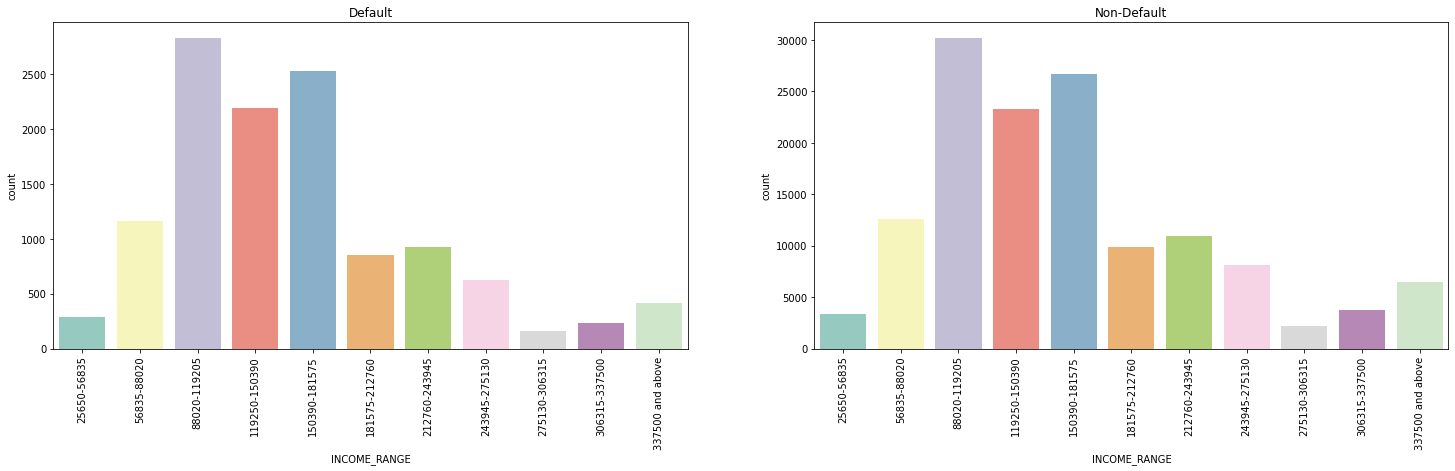

In [164]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
plt.title('Default')
sns.countplot(x='INCOME_RANGE',data=Target_1,palette="Set3")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title('Non-Default')
sns.countplot(x='INCOME_RANGE',data=Target_0,palette="Set3")
plt.xticks(rotation = 90)
plt.show()

Observsation from Plot - 

It can be observed that Bank should take precaution while lending to people in Income Range of 88020-119205.

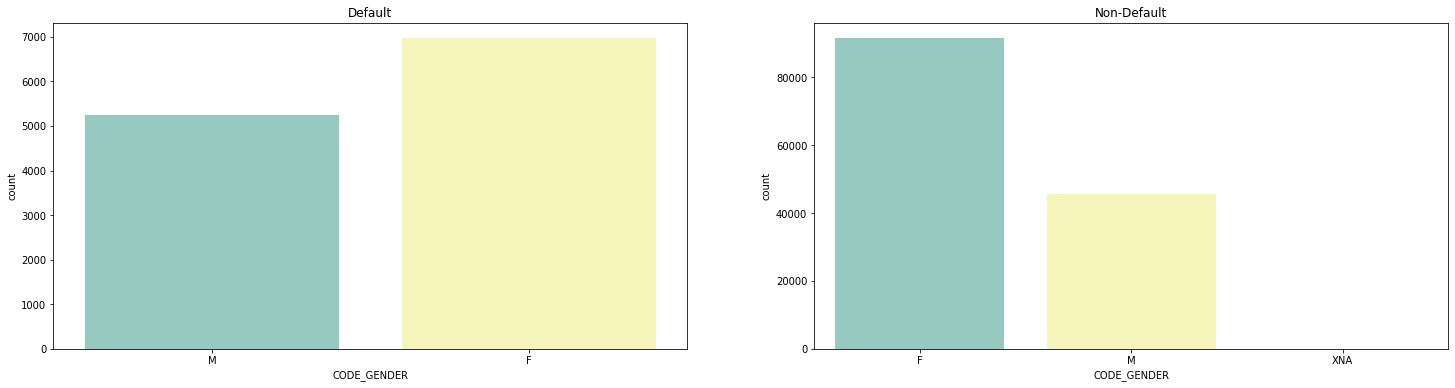

In [165]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
plt.title('Default')
sns.countplot(x='CODE_GENDER',data=Target_1,palette="Set3")

plt.subplot(1,2,2)
plt.title('Non-Default')
sns.countplot(x='CODE_GENDER',data=Target_0,palette="Set3")

plt.show()

Observation - 

There are more chances that Female applicant my default.

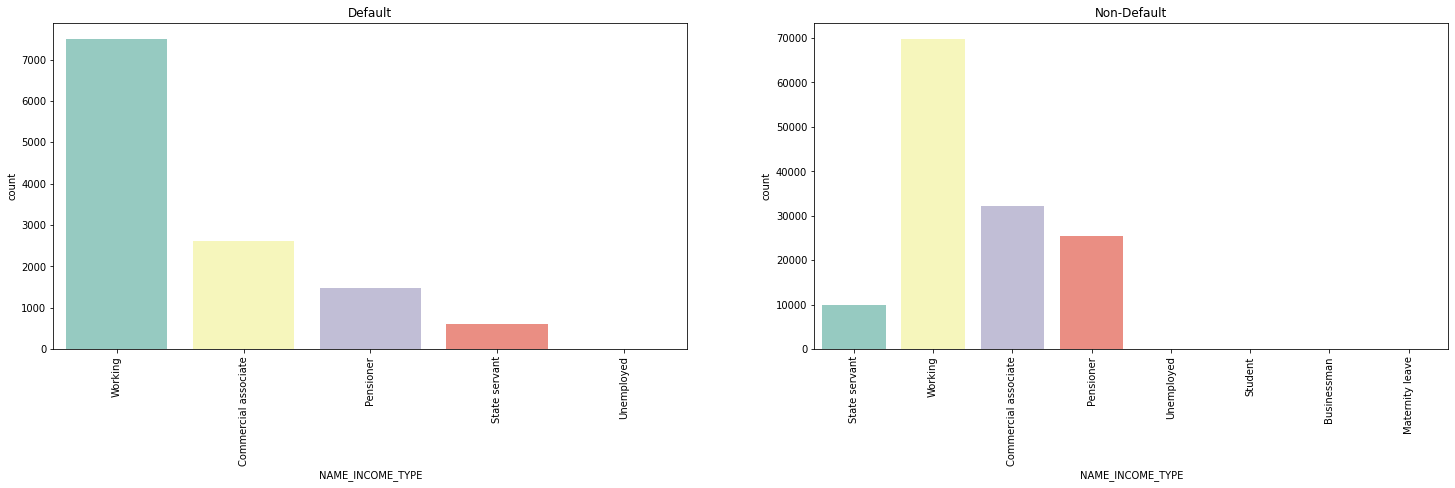

In [166]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
plt.title('Default')
sns.countplot(x='NAME_INCOME_TYPE',data=Target_1,palette="Set3")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title('Non-Default')
sns.countplot(x='NAME_INCOME_TYPE',data=Target_0,palette="Set3")
plt.xticks(rotation = 90)
plt.show()

Obervation - 

There are high percentage of people from Working group who can default on loan.
The Pensioner group has less people with payment difficulty as compared to non-payment difficulty.

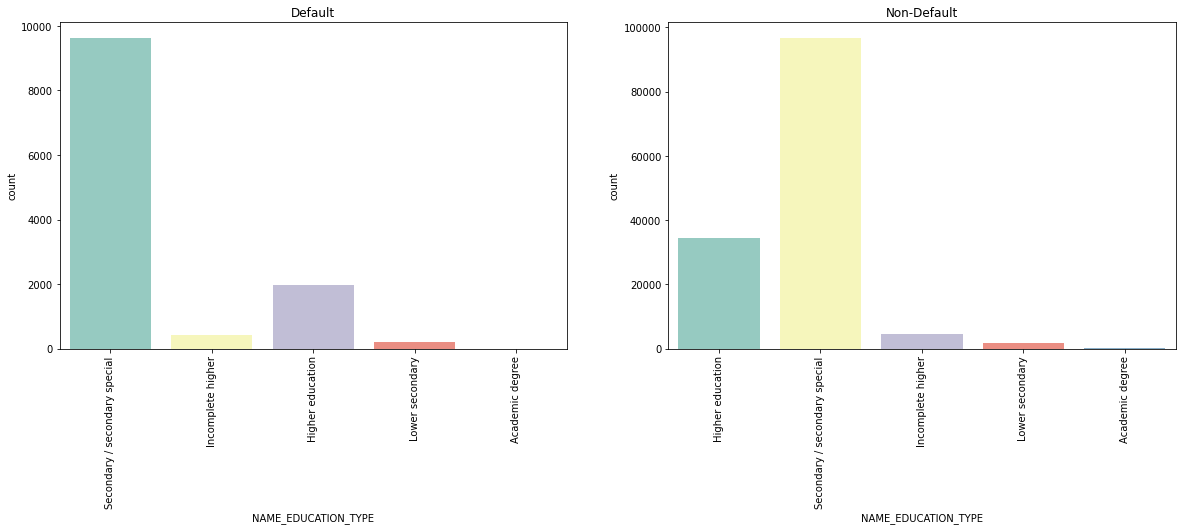

In [167]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Default')
sns.countplot(x='NAME_EDUCATION_TYPE',data=Target_1,palette="Set3")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title('Non-Default')
sns.countplot(x='NAME_EDUCATION_TYPE',data=Target_0,palette="Set3")
plt.xticks(rotation = 90)
plt.show()

Observation - 

It can be observed that loan providing comapny should take precaution while lending to people in Income Range of 88020-119205 with Education Type as Secoundry or secoundry special.

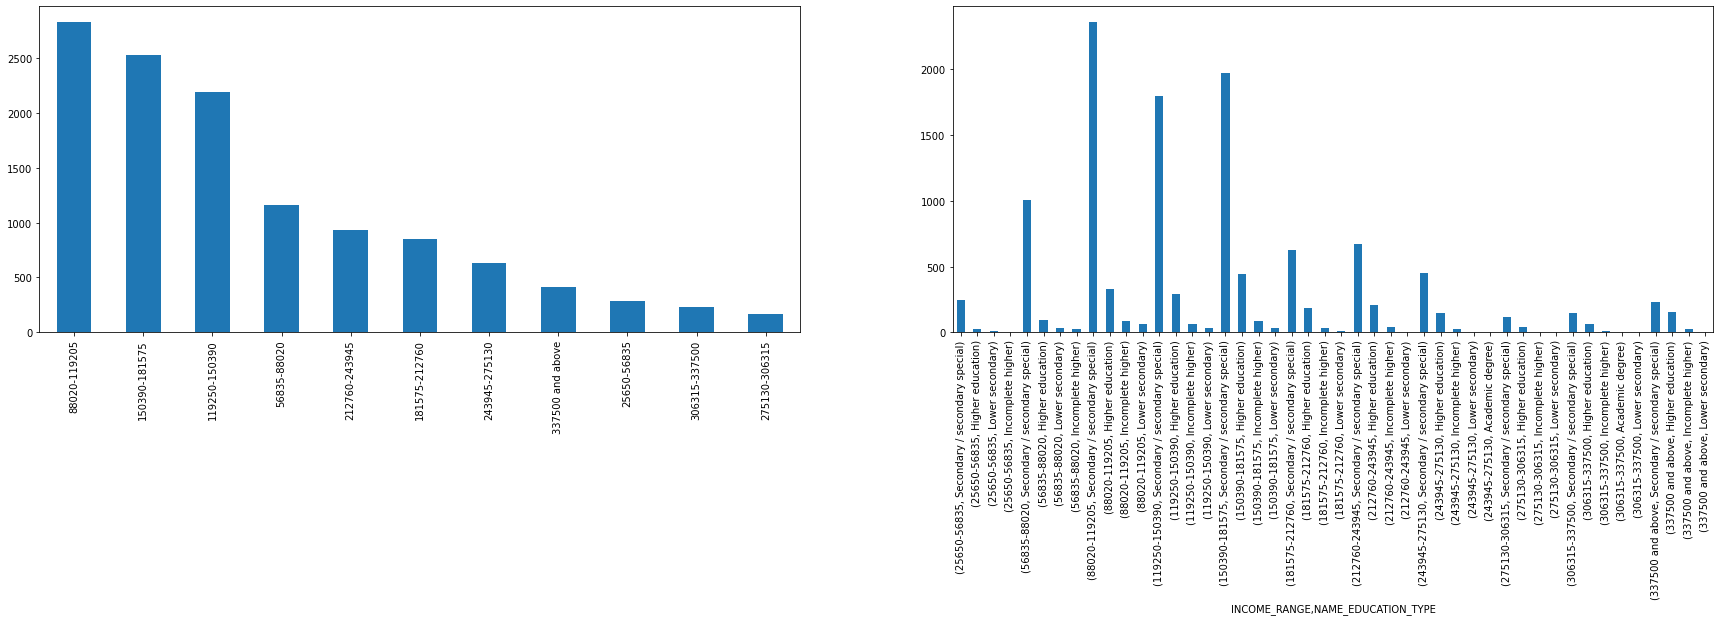

In [168]:
plt.figure(figsize=[30,6])
plt.subplot(1,2,1)
Target_1.INCOME_RANGE.value_counts().plot.bar()
plt.subplot(1,2,2)
Target_1.groupby(["INCOME_RANGE"])['NAME_EDUCATION_TYPE'].value_counts().plot.bar()
plt.show()

####Bivariate Analysis 

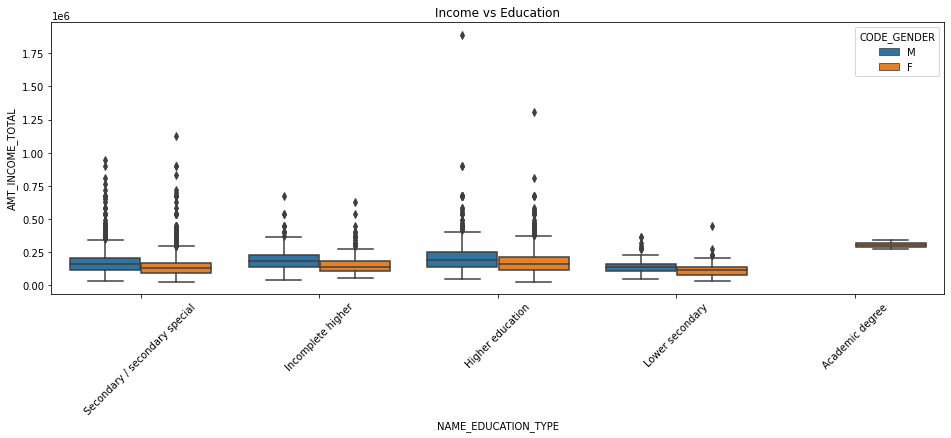

In [169]:
#Considering person's income and education status who have payment difficulty

plt.figure(figsize=(16,5))
plt.xticks(rotation=45)
sns.boxplot(data =Target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='CODE_GENDER',orient='v')
plt.title('Income vs Education')
plt.show()

Observation - 

The highest income people are from Academic degree and all are female applicant who have payment difficulty.


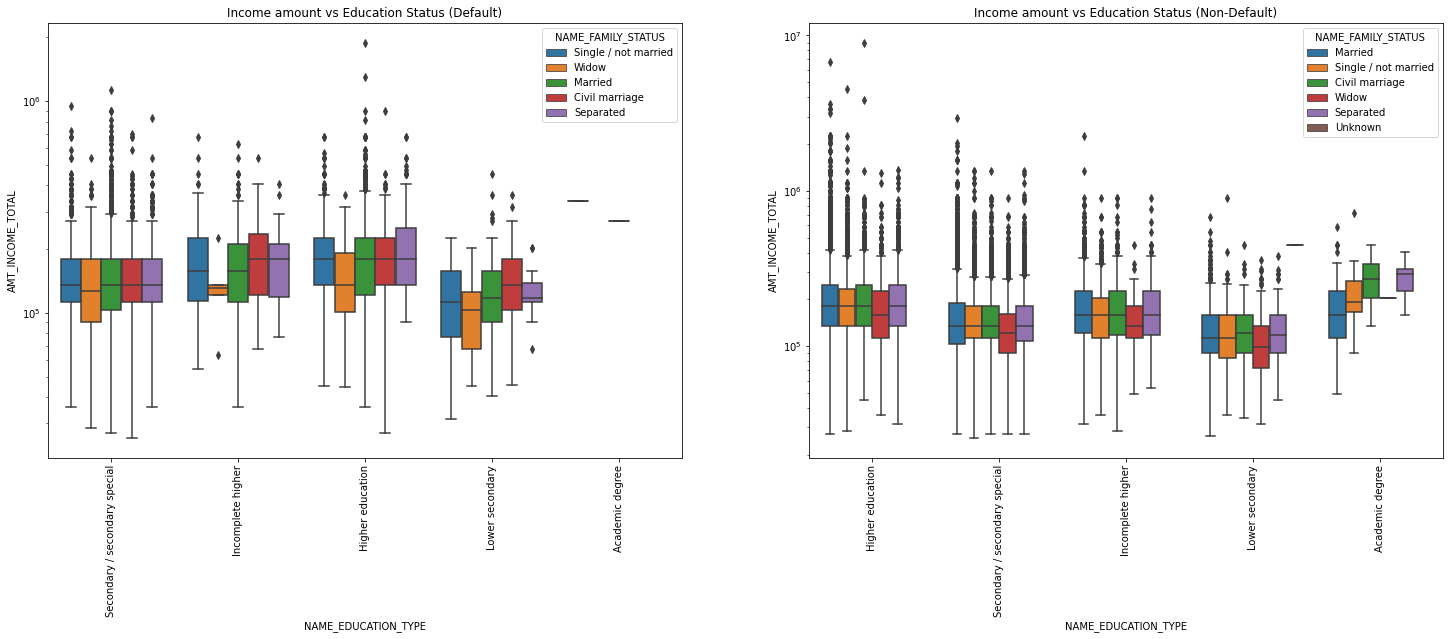

In [170]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.boxplot(data =Target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status (Default)')
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(1,2,2)
sns.boxplot(data =Target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status (Non-Default)')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

Observation - 

With Payment Difficulty
1. People with Seoundry education who have payment difficulty have same Median Salary when compared with Family Status.
2. People with Academic Degree and Family Status as Married have payment difficulty.

Without Payment Difficulty
1. The Median salary of the applicant is approximately same.

####Correlation

In [171]:
Target_1_Corr = Target_1.iloc[0:,2:]
Target_0_Corr = Target_0.iloc[0:,2:]
Corr_1=Target_1_Corr.corr(method='spearman')
Corr_0=Target_0_Corr.corr(method='spearman')

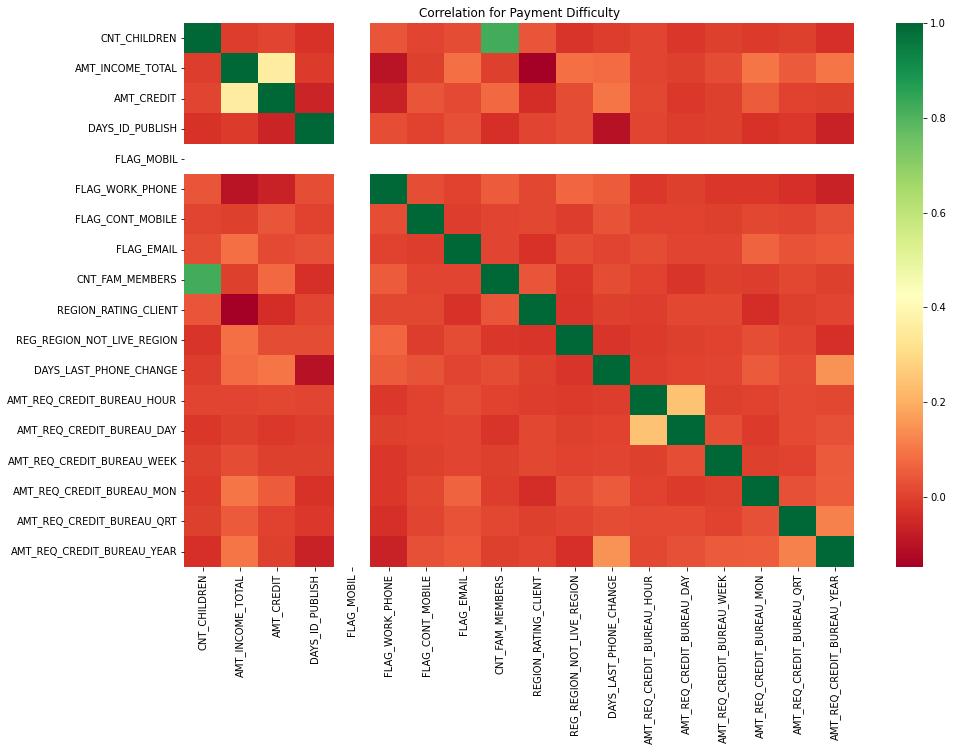

In [172]:
plt.figure(figsize=(15, 10))
sns.heatmap(Corr_1, cmap = 'RdYlGn')
plt.title('Correlation for Payment Difficulty')
plt.show()

Following correlation can be observed in Data Set with people having payment difficulty


DIRECT CORRELATION
1. CNT_CHILDREN and CNT_FAM_MEMBERS.
2. AMT_INCOME_TOTAL and AMT_CREDIT.
3. AMT_REQ_CREDIT_BUREAU_HOUR and AMT_REQ_CREDIT_BUREAU_DAY.
4.DAYS_LAST_PHONE_CHANGE and AMT_REQ_CREDIT_BUREAU_YEAR


INVERSE CORRELATION
1. AMT_TOTAL_INCOME and REGION_RATING_CLIENT
2. FLAG_WORK_PHONE and AMT_INCOME_TOTAL
3. FLAG_WORK_PHONE and AMT_CREDIT
4. DAYS_LAST_PHONE_CHANGE and DAYS_ID_PUBLISH
5. DAYS_ID_PUBLISH and AMT_CREDIT
6. CNT_FAM_MEMBERS and AMT_CREDIT.

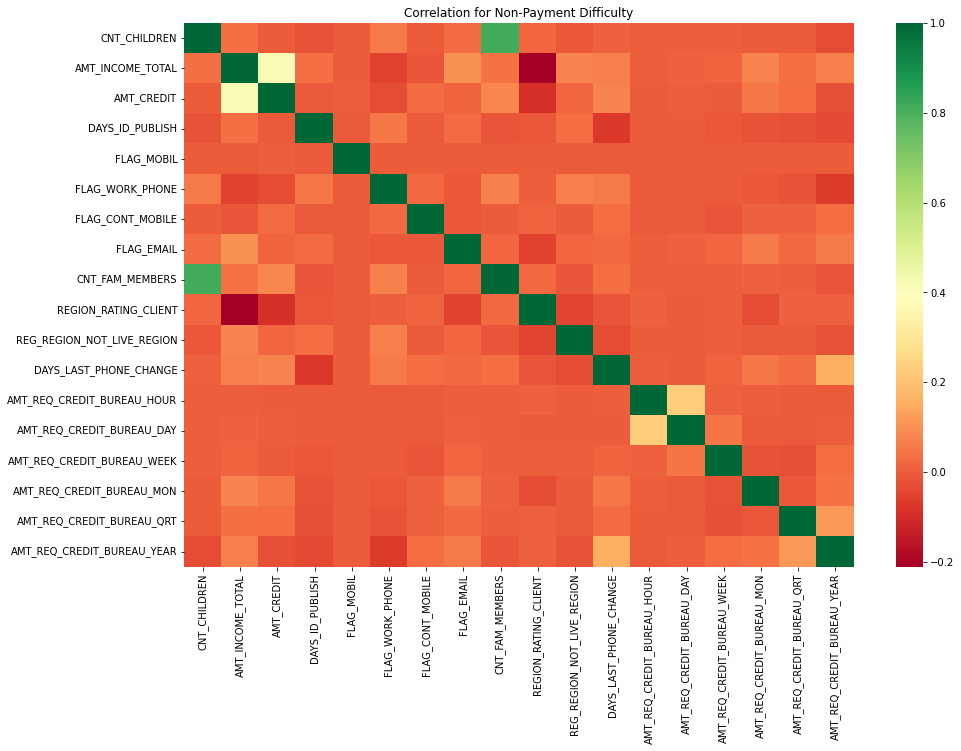

In [173]:
plt.figure(figsize=(15, 10))
sns.heatmap(Corr_0, cmap = 'RdYlGn')
plt.title('Correlation for Non-Payment Difficulty')
plt.show()

Correlation are same as Pyament Difficulty

------------------------------------------------------------Analyzing Previous Application Data Set---------------------------------

In [174]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
df2.shape

(331110, 37)

In [176]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331110 entries, 0 to 331109
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   331110 non-null  int64  
 1   SK_ID_CURR                   331110 non-null  int64  
 2   NAME_CONTRACT_TYPE           331110 non-null  object 
 3   AMT_ANNUITY                  259024 non-null  float64
 4   AMT_APPLICATION              331110 non-null  float64
 5   AMT_CREDIT                   331110 non-null  float64
 6   AMT_DOWN_PAYMENT             158766 non-null  float64
 7   AMT_GOODS_PRICE              256775 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   331110 non-null  object 
 9   HOUR_APPR_PROCESS_START      331110 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  331110 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       331110 non-null  int64  
 12  RATE_DOWN_PAYMENT            158766 non-null  float64
 13 

In [177]:
df2.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    21.771013
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               52.050376
AMT_GOODS_PRICE                22.450243
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              52.050376
RATE_INTEREST_PRIMARY          99.632750
RATE_INTEREST_PRIVILEGED       99.632750
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                48.880130
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

Dropping Column with NULL values greater than 40%.

In [178]:
df2.drop(df2.loc[:,['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']].columns,axis=1,inplace = True)

In [179]:
df2.shape

(331110, 26)

In [180]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331110 entries, 0 to 331109
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   331110 non-null  int64  
 1   SK_ID_CURR                   331110 non-null  int64  
 2   NAME_CONTRACT_TYPE           331110 non-null  object 
 3   AMT_ANNUITY                  259024 non-null  float64
 4   AMT_APPLICATION              331110 non-null  float64
 5   AMT_CREDIT                   331110 non-null  float64
 6   AMT_GOODS_PRICE              256775 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   331110 non-null  object 
 8   HOUR_APPR_PROCESS_START      331110 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  331110 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       331110 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       331110 non-null  object 
 12  NAME_CONTRACT_STATUS         331110 non-null  object 
 13 

In [181]:
df2.nunique()

SK_ID_PREV                     331110
SK_ID_CURR                     189489
NAME_CONTRACT_TYPE                  4
AMT_ANNUITY                    134575
AMT_APPLICATION                 43262
AMT_CREDIT                      50301
AMT_GOODS_PRICE                 43262
WEEKDAY_APPR_PROCESS_START          7
HOUR_APPR_PROCESS_START            24
FLAG_LAST_APPL_PER_CONTRACT         2
NFLAG_LAST_APPL_IN_DAY              2
NAME_CASH_LOAN_PURPOSE             25
NAME_CONTRACT_STATUS                4
DAYS_DECISION                    2921
NAME_PAYMENT_TYPE                   4
CODE_REJECT_REASON                  9
NAME_CLIENT_TYPE                    4
NAME_GOODS_CATEGORY                27
NAME_PORTFOLIO                      5
NAME_PRODUCT_TYPE                   3
CHANNEL_TYPE                        8
SELLERPLACE_AREA                 1799
NAME_SELLER_INDUSTRY               11
CNT_PAYMENT                        39
NAME_YIELD_GROUP                    5
PRODUCT_COMBINATION                18
dtype: int64

In [182]:
id1 = ['SK_ID_PREV','SK_ID_CURR']
cat1 = ['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']
cont1=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT',]

Boxplot for AMT_ANNUITY


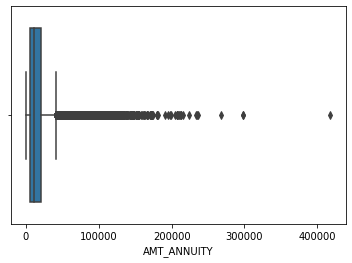

Boxplot for AMT_APPLICATION


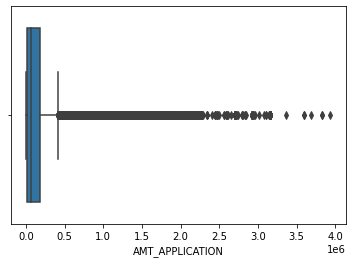

Boxplot for AMT_CREDIT


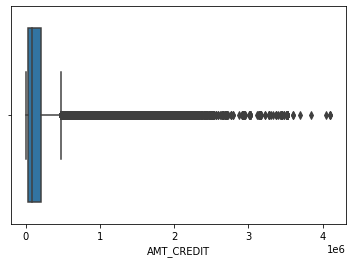

Boxplot for AMT_GOODS_PRICE


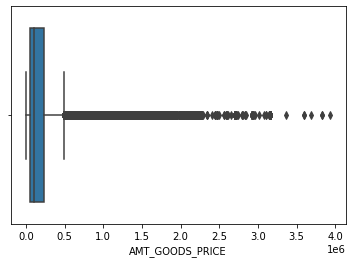

Boxplot for HOUR_APPR_PROCESS_START


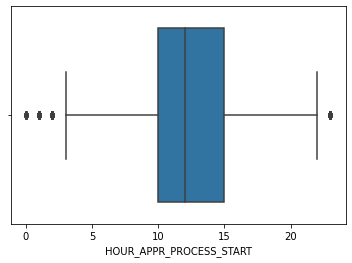

Boxplot for DAYS_DECISION


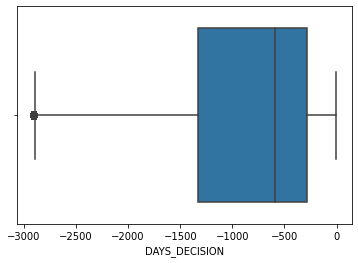

Boxplot for SELLERPLACE_AREA


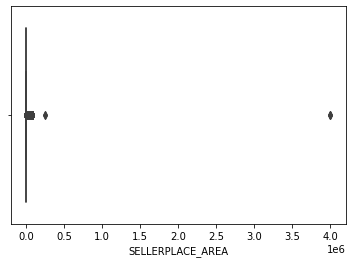

Boxplot for CNT_PAYMENT


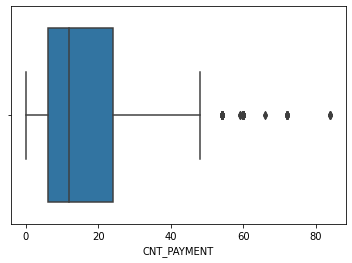

In [183]:
for i in cont1:
  print('Boxplot for',i)
  sns.boxplot(df2[i])
  plt.show()

In [184]:
df2.DAYS_DECISION = df2.DAYS_DECISION.abs()
df2.DAYS_DECISION.describe()

count    331110.000000
mean        891.770919
std         784.737784
min           2.000000
25%         284.000000
50%         590.000000
75%        1329.000000
max        2922.000000
Name: DAYS_DECISION, dtype: float64

In [185]:
df2.PRODUCT_COMBINATION.value_counts()

Cash                              55018
POS household with interest       54439
POS mobile with interest          45388
Cash X-Sell: middle               27425
Cash X-Sell: low                  24731
Card Street                       22149
POS industry with interest        20282
POS household without interest    17024
Card X-Sell                       15676
Cash Street: high                 11518
Cash X-Sell: high                 11345
Cash Street: middle                6686
Cash Street: low                   6546
POS other with interest            4886
POS mobile without interest        4843
POS industry without interest      2538
POS others without interest         554
Ca                                    1
Name: PRODUCT_COMBINATION, dtype: int64

In [186]:
df2.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    21.771013
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                22.450243
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    21.770711
NAME_YIELD_GROUP

Handling Midding Values

1.AMT_ANNUITY - This column describes annunity amount, which will be different for each applicant. Hence not replacing NULL values with Median value.

2.AMT_GOODS_PRICE - This column described the amount that applicant asked in previous application. Since every applicant will have a different demand, hence not replacing NULL values with Median value.

3.CNT_PAYMENT - replacing the NULL values with Median value.

4.PRODUCT_COMBINATION - replacing the NULL values with MODE value.

Imputing Values

In [187]:
df2.CNT_PAYMENT= df2.CNT_PAYMENT.fillna(df2.CNT_PAYMENT.median())

In [188]:
df2.PRODUCT_COMBINATION= df2.PRODUCT_COMBINATION.fillna(df2.PRODUCT_COMBINATION.mode()[0])

In [189]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331110 entries, 0 to 331109
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   331110 non-null  int64  
 1   SK_ID_CURR                   331110 non-null  int64  
 2   NAME_CONTRACT_TYPE           331110 non-null  object 
 3   AMT_ANNUITY                  259024 non-null  float64
 4   AMT_APPLICATION              331110 non-null  float64
 5   AMT_CREDIT                   331110 non-null  float64
 6   AMT_GOODS_PRICE              256775 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   331110 non-null  object 
 8   HOUR_APPR_PROCESS_START      331110 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  331110 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       331110 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       331110 non-null  object 
 12  NAME_CONTRACT_STATUS         331110 non-null  object 
 13 

In [190]:
df2.NAME_CONTRACT_TYPE.value_counts(normalize = True)*100

Consumer loans     45.288273
Cash loans         43.269306
Revolving loans    11.423998
XNA                 0.018423
Name: NAME_CONTRACT_TYPE, dtype: float64

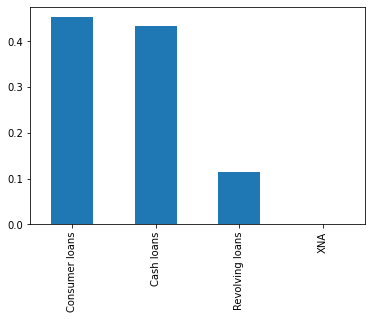

In [191]:
df2.NAME_CONTRACT_TYPE.value_counts(normalize = True).plot.bar()
plt.show()

Distribution of Contract Type.

Cash Loans and Consumer Loan are the two in demand products.

Assuming XNA as all other types of loan.

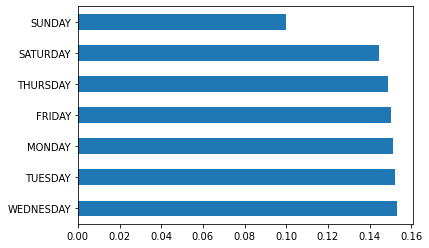

In [192]:
df2.WEEKDAY_APPR_PROCESS_START.value_counts(normalize = True).plot.barh()

Assumption - Only 2 saturday working per month.

Looking at the plot it can be concluded that Day of the week not have have much impact on Application Start.

It can also be observed that application were also started on Sunday.

In [193]:
df2.NAME_PAYMENT_TYPE.value_counts(normalize = True)*100

Cash through the bank                        62.722056
XNA                                          36.684788
Non-cash from your account                    0.525807
Cashless from the account of the employer     0.067349
Name: NAME_PAYMENT_TYPE, dtype: float64

XNA is a Null Value, but not imputing as it will lead to increase in count Cash Payment which will be not be correct.

Observation - 

Applicant prefer Cash payment, loan providing comapny can take steps tp educate application about online payment and develop required IT infrastructure.

In [194]:
df2.NAME_CASH_LOAN_PURPOSE.value_counts(normalize = True)*100

XAP                                 56.730694
XNA                                 39.223823
Repairs                              1.381716
Other                                0.901815
Urgent needs                         0.495908
Buying a used car                    0.170034
Building a house or an annex         0.157048
Everyday expenses                    0.141343
Medicine                             0.124732
Payments on other loans              0.109631
Education                            0.090000
Journey                              0.066745
Buying a new car                     0.062819
Wedding / gift / holiday             0.057081
Purchase of electronic equipment     0.055873
Buying a home                        0.047718
Car repairs                          0.047416
Furniture                            0.047416
Buying a holiday home / land         0.035940
Business development                 0.021745
Gasification / water supply          0.017517
Buying a garage                   

XAP and XNA are NULL values. Assuming the values are MNAR type of missing values. Hence Not imputing it.

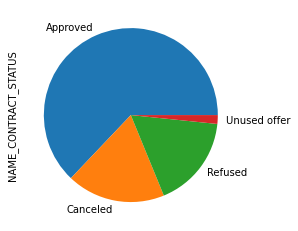

In [195]:
df2.NAME_CONTRACT_STATUS.value_counts(normalize = True).plot.pie()

The major application is the past were approved

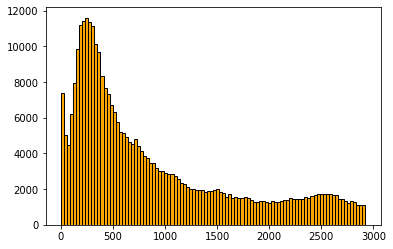

In [196]:
plt.hist(df2.DAYS_DECISION,bins = 100, edgecolor= 'black', color = 'orange')
plt.show()

Loan providing company can approach applicants after 2 years for loan.

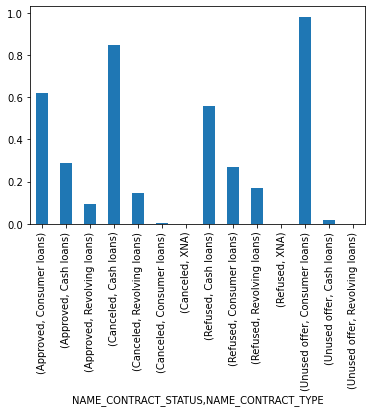

In [197]:
df2.groupby(by = ['NAME_CONTRACT_STATUS'])['NAME_CONTRACT_TYPE'].value_counts(normalize =True).plot.bar()
plt.show()

Observation - 

Highest Approval - Consumer Loan

Cancellation - Cash Loan

Refused - Cash Loan

Unused  - Consumer Loan

Loan Providing company should give more preference to Consumer Loan as cancellation as more in Cash Loan.

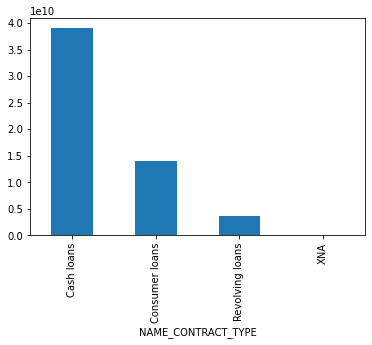

In [198]:
df2.groupby(by=['NAME_CONTRACT_TYPE'])['AMT_APPLICATION'].sum().plot.bar()
plt.show()

Even though the percentage of application for Cash Loan and COnsumer Loan is almost similar, but the request amount for Cash Loan is Higher.

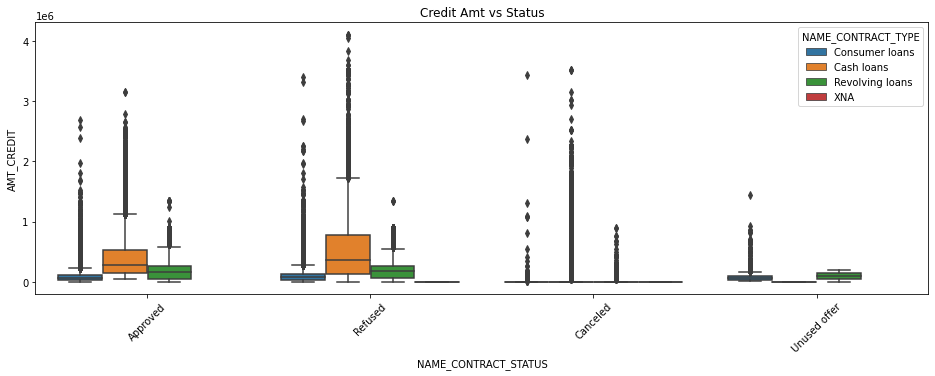

In [199]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=45)
sns.boxplot(data =df2, x='NAME_CONTRACT_STATUS',y='AMT_CREDIT', hue ='NAME_CONTRACT_TYPE',orient='v')
plt.title('Credit Amt vs Status')
plt.show()

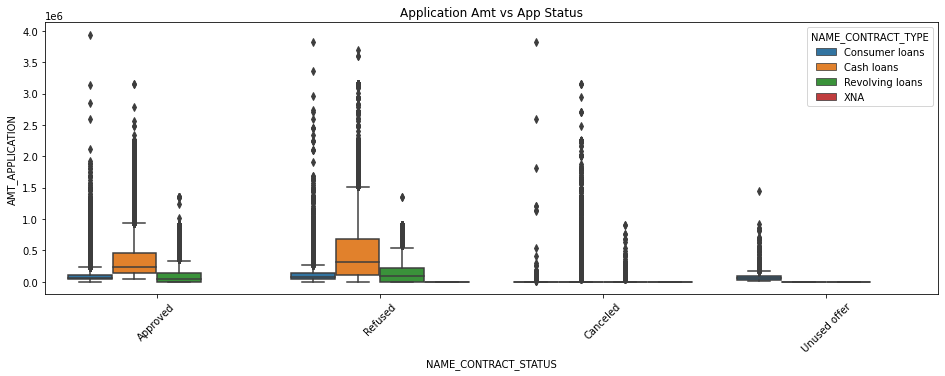

In [200]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=45)
sns.boxplot(data =df2, x='NAME_CONTRACT_STATUS',y='AMT_APPLICATION', hue ='NAME_CONTRACT_TYPE',orient='v')
plt.title('Application Amt vs App Status')
plt.show()

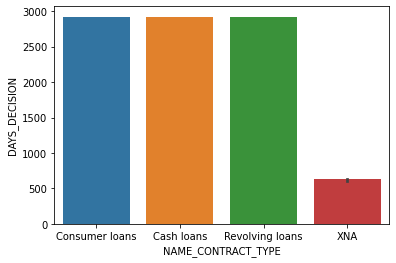

In [201]:
sns.barplot(data= df2, x= 'NAME_CONTRACT_TYPE', y = 'DAYS_DECISION', estimator = np.max)
plt.show()

Observation - 

The max time for decision about previous application made is almost same.

In [202]:
df2_Corr = df2.iloc[0:,2:]
Corr_11=df2_Corr.corr(method='spearman')


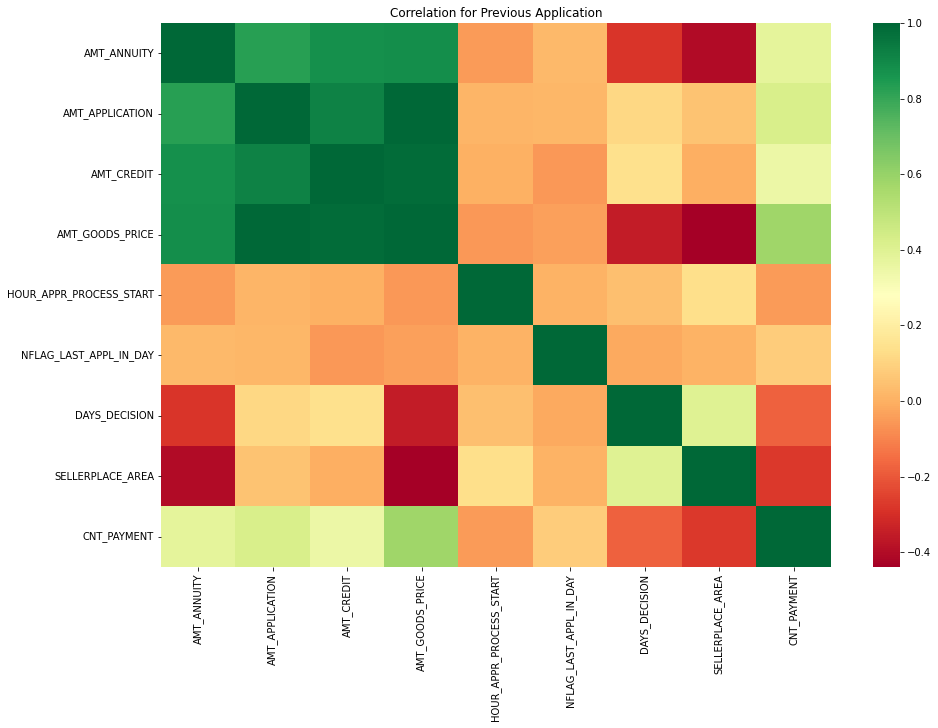

In [203]:
plt.figure(figsize=(15, 10))
sns.heatmap(Corr_11, cmap = 'RdYlGn')
plt.title('Correlation for Previous Application')
plt.show()

Observation - 

Positive Correlation
1. AMT_ANNUITY and AMT_GOODS_PRICE
2. AMT_ANNUITY and AMT_CREDIT
3. AMT_ANNUITY and AMT_APPLICATION
4. AMT_APPLICATION and AMT_GOODS_PRICE
5. AMT_APPLICATION and AMT_CREDIT
6. AMT_CREDIT and AMT_GOODS_PRICE
7. AMT_GOODS_PRICE and CNT_PAYMENT
8. CNT_PAYMENT and AMT_ANNUITY
9. CNT_PAYMENT and AMT_APPLICATION
10. DAYS_DECISION and SELLERPLACE_AREA


Negative Correlation
1. SELLERPLACE_AREA and AMT_ANNUITY

In [204]:
df2.AMT_GOODS_PRICE.isnull().mean()*100

22.450243121621213

In [205]:
df3 = df1.loc[:,['SK_ID_CURR','TARGET','CODE_GENDER','NAME_CONTRACT_TYPE','INCOME_RANGE']]

In [206]:
df3

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_CONTRACT_TYPE,INCOME_RANGE
0,100002,1,M,Cash loans,181575-212760
1,100003,0,F,Cash loans,243945-275130
2,100004,0,M,Revolving loans,56835-88020
3,100006,0,F,Cash loans,119250-150390
4,100007,0,M,Cash loans,119250-150390
...,...,...,...,...,...
149476,273302,0,F,Cash loans,56835-88020
149477,273303,0,F,Cash loans,181575-212760
149478,273305,0,M,Cash loans,337500 and above
149479,273306,1,M,Cash loans,150390-181575


In [207]:
df4 = df2.loc[:,['SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE']]

In [208]:
df4

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE
0,271877,Consumer loans,17145.000,17145.000,17145.000,Approved,Cash through the bank
1,108129,Cash loans,607500.000,679671.000,607500.000,Approved,XNA
2,122040,Cash loans,112500.000,136444.500,112500.000,Approved,Cash through the bank
3,176158,Cash loans,450000.000,470790.000,450000.000,Approved,Cash through the bank
4,202054,Cash loans,337500.000,404055.000,337500.000,Refused,Cash through the bank
...,...,...,...,...,...,...,...
331105,132092,Cash loans,900000.000,978408.000,900000.000,Approved,Cash through the bank
331106,279544,Cash loans,229500.000,296761.500,229500.000,Refused,Cash through the bank
331107,148251,Cash loans,432577.665,492531.165,432577.665,Approved,Cash through the bank
331108,142046,Cash loans,675000.000,721332.000,675000.000,Approved,XNA


####Merging of Data Set

In [209]:
df5 = df3.merge(df4, on = 'SK_ID_CURR', how = 'inner')

In [210]:
df5.shape

(135863, 11)

In [211]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135863 entries, 0 to 135862
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   SK_ID_CURR            135863 non-null  int64   
 1   TARGET                135863 non-null  int64   
 2   CODE_GENDER           135863 non-null  object  
 3   NAME_CONTRACT_TYPE_x  135863 non-null  object  
 4   INCOME_RANGE          135862 non-null  category
 5   NAME_CONTRACT_TYPE_y  135863 non-null  object  
 6   AMT_APPLICATION       135863 non-null  float64 
 7   AMT_CREDIT            135863 non-null  float64 
 8   AMT_GOODS_PRICE       106042 non-null  float64 
 9   NAME_CONTRACT_STATUS  135863 non-null  object  
 10  NAME_PAYMENT_TYPE     135863 non-null  object  
dtypes: category(1), float64(3), int64(2), object(5)
memory usage: 11.5+ MB


In [212]:
df5.isnull().mean()*100

SK_ID_CURR               0.000000
TARGET                   0.000000
CODE_GENDER              0.000000
NAME_CONTRACT_TYPE_x     0.000000
INCOME_RANGE             0.000736
NAME_CONTRACT_TYPE_y     0.000000
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000000
AMT_GOODS_PRICE         21.949317
NAME_CONTRACT_STATUS     0.000000
NAME_PAYMENT_TYPE        0.000000
dtype: float64

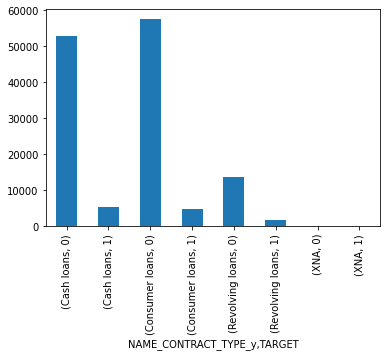

In [213]:
df5.groupby(by = ['NAME_CONTRACT_TYPE_y'])['TARGET'].value_counts().plot.bar()

Observation - 

Loan providing company should be careful while lending Cash Loans.

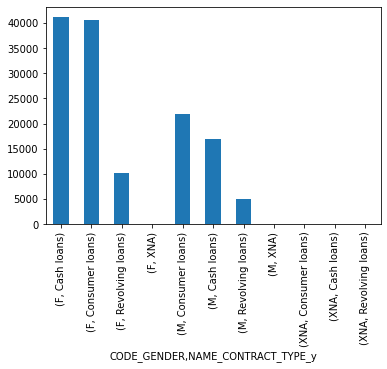

In [214]:
df5.groupby(by = ['CODE_GENDER'])['NAME_CONTRACT_TYPE_y'].value_counts().plot.bar()

In [215]:
df5.TARGET.mean()

0.08669026887379198

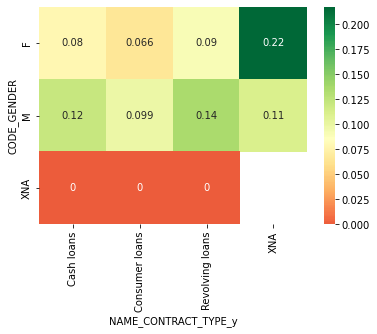

In [216]:
res = pd.pivot_table(data=df5, index="CODE_GENDER", columns="NAME_CONTRACT_TYPE_y", values="TARGET")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.086)
plt.show()

Assumption - XNA as other type of loan

Observation - 

1. Loan Providing Comapny should be caution in following situation

  a. Male while taking other type of loan.

  b. Female while taking other type of loan.

  c. Male while taking cash loan.


In [217]:
bins = [0,10000,20000,30000,40000,50000,100000,200000,300000,1000000000]
slots = ['0-10000','10000-20000','20000-30000','30000-40000','40000-50000', '50000-100000',
          '100000-200000','200000-300000','300000 and above']


df5['CREDIT_RANGE'] = pd.cut(df5['AMT_CREDIT'],bins,labels = slots)

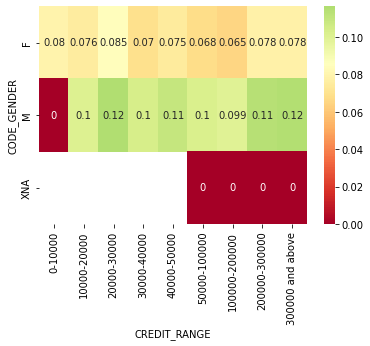

In [218]:
res1 = pd.pivot_table(data=df5, index="CODE_GENDER", columns="CREDIT_RANGE", values="TARGET")
sns.heatmap(res1, cmap="RdYlGn", annot=True, center=0.086)
plt.show()

Observation - 

Femal applicant in the Credit range of 0-10000 have defaulted more.

In [219]:
df5.AMT_CREDIT.describe()

count    1.358630e+05
mean     1.903026e+05
std      3.100411e+05
min      0.000000e+00
25%      2.550150e+04
50%      7.900650e+04
75%      2.025000e+05
max      3.690000e+06
Name: AMT_CREDIT, dtype: float64

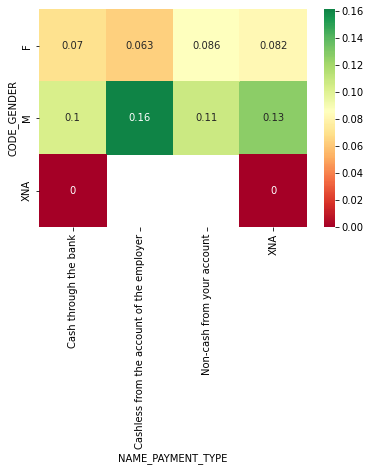

In [220]:
res2 = pd.pivot_table(data=df5, index="CODE_GENDER", columns="NAME_PAYMENT_TYPE", values="TARGET")
sns.heatmap(res2, cmap="RdYlGn", annot=True, center=0.086)
plt.show()

Observation - 

Loan Providing company should be caution when Male applicant Payment mode is not clear.

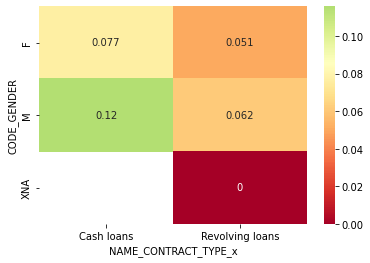

In [221]:
res3 = pd.pivot_table(data=df5, index="CODE_GENDER", columns="NAME_CONTRACT_TYPE_x", values="TARGET")
sns.heatmap(res3, cmap="RdYlGn", annot=True, center=0.086)
plt.show()

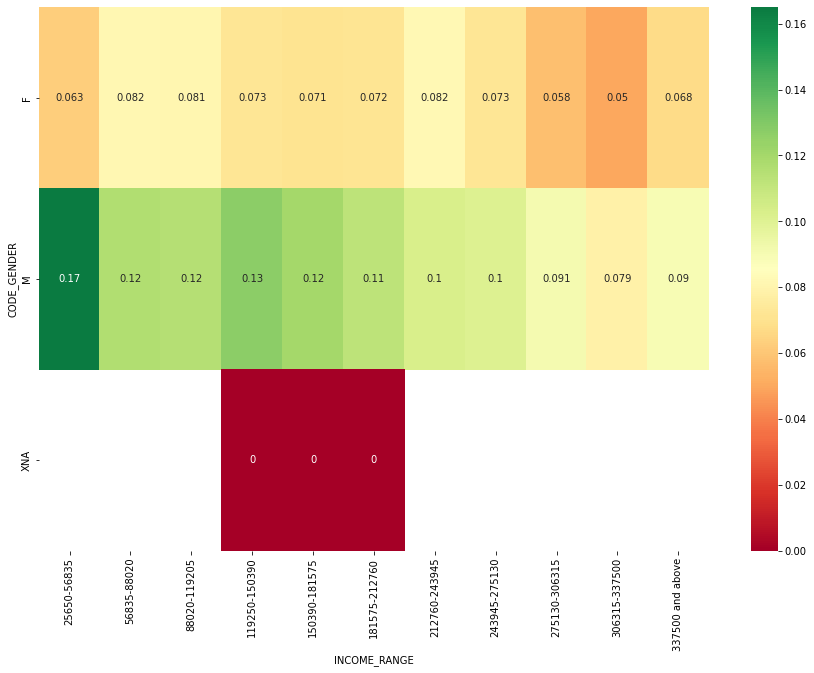

In [222]:
res4 = pd.pivot_table(data=df5, index="CODE_GENDER", columns="INCOME_RANGE", values="TARGET")
plt.figure(figsize = [15,10])
sns.heatmap(res4, cmap="RdYlGn", annot=True, center=0.086)
plt.show()

Observation - 

Male applicant at lower income range  are more prone to default.